## BioDiversity-Project

### Aim of this project

             1) Inspect data
             2) Analyze data

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Inspect data

In [246]:
#Loading data
observ = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")

#### *A) Observations.csv*

In [247]:
print(observ.head(5))

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [248]:
print(observ.describe())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


In [249]:
print(observ.info)

<bound method DataFrame.info of                                scientific_name  \
0                           Vicia benghalensis   
1                               Neovison vison   
2                            Prunus subcordata   
3                         Abutilon theophrasti   
4                     Githopsis specularioides   
...                                        ...   
23291                     Croton monanthogynus   
23292                 Otospermophilus beecheyi   
23293  Heterotheca sessiliflora ssp. echioides   
23294                     Dicranella rufescens   
23295                           Cucurbita pepo   

                                 park_name  observations  
0      Great Smoky Mountains National Park            68  
1      Great Smoky Mountains National Park            77  
2                   Yosemite National Park           138  
3                      Bryce National Park            84  
4      Great Smoky Mountains National Park            85  
...          

In [250]:
print(observ.shape)
print(observ.scientific_name.nunique())
print(observ.park_name.unique())
print(observ.park_name.nunique())

(23296, 3)
5541
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
4


#### *B) Species.csv*

In [251]:
print(species_info.head(5))

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [252]:
print(species_info.describe())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


In [308]:
print(species_info.shape)
print(species_info.category.unique())
print(species_info.groupby("category").size())

(5824, 4)
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


In [309]:
print(species_info.groupby("conservation_status").size())

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


In [335]:
print(species_info.conservation_status.dropna().reset_index())

     index conservation_status
0        7  Species of Concern
1        8          Endangered
2        9          Endangered
3       29  Species of Concern
4       30  Species of Concern
..     ...                 ...
186   5302  Species of Concern
187   5399  Species of Concern
188   5426  Species of Concern
189   5436  Species of Concern
190   5676  Species of Concern

[191 rows x 2 columns]


### Data analysis


#### Questions:
        1) Distribution of observation locations?
        2) How many species and categories are there?
        3) Which category of species have bad conservation status?

#### *1) Observations*

In [255]:
Total_observations = observ.observations.sum()
print("Total Observations in NY:", Total_observations)

Plants = observ.scientific_name
print("Total of", observ.scientific_name.nunique(), "plants found in NY from", observ.park_name.nunique(), "parks")

Total Observations in NY: 3314739
Total of 5541 plants found in NY from 4 parks


In [256]:
#groupby for plotting
group = observ.groupby("park_name")["observations"].sum()
result = group.reset_index()

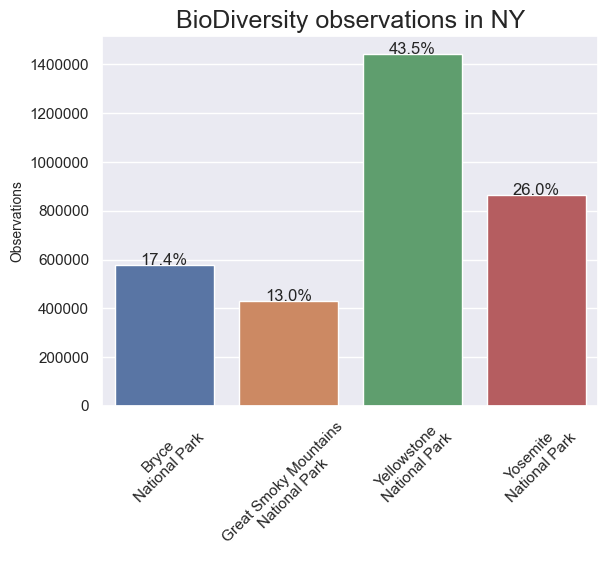

In [257]:
ax = sns.barplot(x="park_name", y="observations", data=result)
#x axis label rotation
plt.xticks(rotation=45)

#make x labels in two rows
x_labels = [name.replace(" National Park", "\nNational Park") for name in result["park_name"]]
ax.set_xticklabels(x_labels)

#set y axis numbers non-mathematical
plt.gca().ticklabel_format(style='plain', axis='y')


#calculate observations % and place the text on correct position
for p in ax.patches:
    height = (p.get_height() / Total_observations) * 100
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{round(float(height),1):,}%', ha='center')


#x and y label-font settings
plt.xlabel("")
plt.ylabel("Observations", fontdict={'size': 10})

    
#plot settings
sns.set_style('whitegrid')
sns.set_palette('deep')
sns.set(font_scale=1)
ax.set_title('BioDiversity observations in NY', fontdict={'fontsize': 18})

plt.show()

#### *2) Species*

In [331]:
#groupby for plotting
df = species_info.groupby("category")

category_sizes = pd.DataFrame({"category": df.groups.keys(), "size": df.size()})

Total_species = len(species_info.category)
print("The number of total species is", Total_species)
print("Species are separated to", species_info.category.nunique(), "different categories listed below:")
print("")

for name, group in df:
    print("Category Name:", name, ", Category Size:", len(group))
    print("")

The number of total species is 5824
Species are separated to 7 different categories listed below:

Category Name: Amphibian , Category Size: 80

Category Name: Bird , Category Size: 521

Category Name: Fish , Category Size: 127

Category Name: Mammal , Category Size: 214

Category Name: Nonvascular Plant , Category Size: 333

Category Name: Reptile , Category Size: 79

Category Name: Vascular Plant , Category Size: 4470



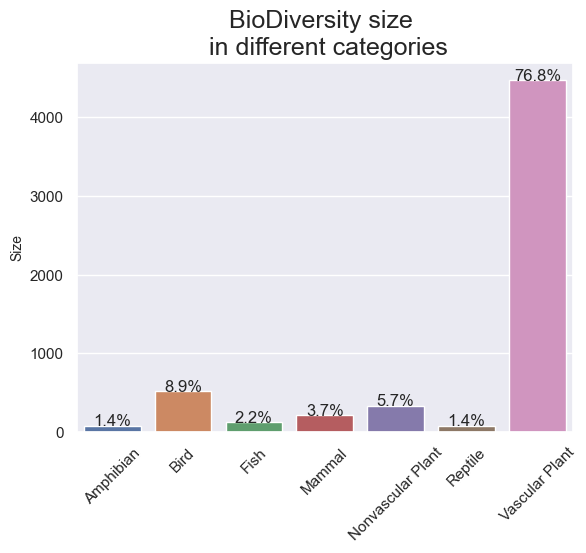

In [366]:
ax = sns.barplot(x="category", y="size", data=category_sizes)

plt.xticks(rotation=45)
plt.xlabel("")

#
sns.set_style('whitegrid')
sns.set_palette('deep')
sns.set(font_scale=1)
ax.set_title('BioDiversity size \n in different categories', fontdict={'fontsize': 18})

#calculate observations % and place the text on correct position
for g in ax.patches:
    height_g = (g.get_height() / Total_species) * 100
    ax.text(g.get_x() + g.get_width() / 2, g.get_height(), f'{round(float(height_g),1):,}%', ha='center')

#x and y label-font settings
plt.xlabel("")
plt.ylabel("Size", fontdict={'size': 10})


plt.show()

In [360]:
Total_species_status = len(species_info.conservation_status.dropna().reset_index())

print("Conservation status recorded for", Total_species_status , "species")

status = species_info.conservation_status.dropna().reset_index()
grouped = status.groupby("conservation_status").size()
grouped_frames = pd.DataFrame({"Groups": grouped.keys(), "Size": grouped})

Conservation status recorded for 191 species


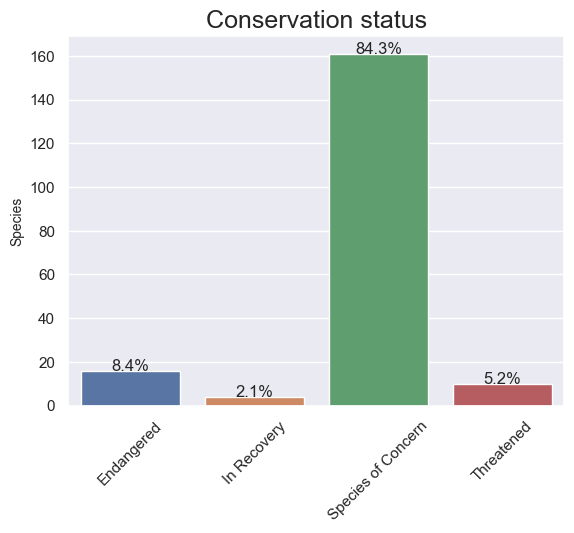

In [368]:
ax = sns.barplot(x="Groups", y="Size", data=grouped_frames)

plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.set_palette('deep')
sns.set(font_scale=1)
ax.set_title("Conservation status", fontdict={'fontsize': 18})

#calculate observations % and place the text on correct position
for h in ax.patches:
    height_h = (h.get_height() / Total_species_status) * 100
    ax.text(h.get_x() + h.get_width() / 2, h.get_height(), f'{round(float(height_h),1):,}%', ha='center')
    
#x and y label-font settings
plt.xlabel("")
plt.ylabel("Species", fontdict={'size': 10})


plt.show()